In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Clustering-5.csv')

# Display the first few rows of the dataframe
print(df.head())


       BALANCE  PURCHASES  ONE-OFF_PURCHASES  INST_PURCHASES  CASH_ADVANCE  \
0    40.900749      95.40               0.00            95.4      0.000000   
1  3202.467416       0.00               0.00             0.0   6442.945483   
2  2495.148862     773.17             773.17             0.0      0.000000   
3  1666.670542    1499.00            1499.00             0.0    205.788017   
4   817.714335      16.00              16.00             0.0      0.000000   

   CASH_ADVANCE_TRX  PURCHASES_TRX     PAYMENTS  PRC_FULL_PAYMENT  
0                 0              2   201.802084          0.000000  
1                 4              0  4103.032597          0.222222  
2                 0             12   622.066742          0.000000  
3                 1              1     0.000000          0.000000  
4                 0              1   678.334763          0.000000  


In [4]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values or drop rows/columns with missing values
# Here's an example of filling missing values with the median
df.fillna(df.median(), inplace=True)


BALANCE              0
PURCHASES            0
ONE-OFF_PURCHASES    0
INST_PURCHASES       0
CASH_ADVANCE         0
CASH_ADVANCE_TRX     0
PURCHASES_TRX        0
PAYMENTS             0
PRC_FULL_PAYMENT     0
dtype: int64


In [5]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Filter out the outliers by keeping only valid values
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)


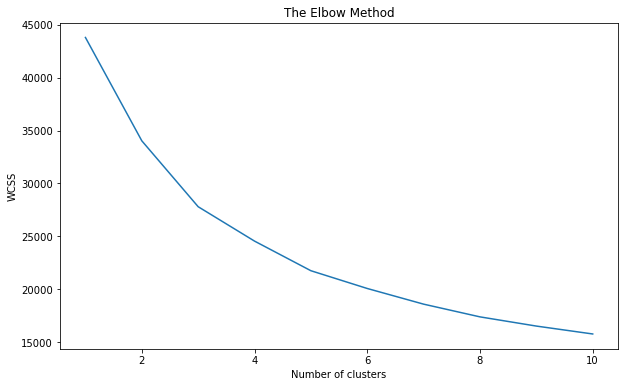

In [7]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the Elbow Method
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within Cluster Sum of Squares
plt.show()


In [8]:
# Assuming the elbow is observed at 4 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(scaled_df)

# Add cluster labels to the dataframe
df['Cluster'] = cluster_labels

# Display the first few rows with cluster labels
print(df.head())

       BALANCE  PURCHASES  ONE-OFF_PURCHASES  INST_PURCHASES  CASH_ADVANCE  \
0    40.900749      95.40               0.00            95.4           0.0   
2  2495.148862     773.17             773.17             0.0           0.0   
4   817.714335      16.00              16.00             0.0           0.0   
7  1823.652743     436.20               0.00           436.2           0.0   
8  1014.926473     861.49             661.49           200.0           0.0   

   CASH_ADVANCE_TRX  PURCHASES_TRX    PAYMENTS  PRC_FULL_PAYMENT  Cluster  
0                 0              2  201.802084               0.0        2  
2                 0             12  622.066742               0.0        0  
4                 0              1  678.334763               0.0        2  
7                 0             12  679.065082               0.0        2  
8                 0              5  688.278568               0.0        0  


In [9]:
# Group the data by clusters and calculate mean values
cluster_groups = df.groupby('Cluster').mean()

# Display the mean values per cluster
print(cluster_groups)


             BALANCE    PURCHASES  ONE-OFF_PURCHASES  INST_PURCHASES  \
Cluster                                                                
0        1253.316239  1054.320549         653.628416      401.143509   
1        1768.769418   115.139863          68.486827       46.672093   
2         718.552298   201.883180         100.179249      102.270233   
3         114.348563   377.068559         140.818646      236.249913   

         CASH_ADVANCE  CASH_ADVANCE_TRX  PURCHASES_TRX     PAYMENTS  \
Cluster                                                               
0          207.897213          0.924431      17.885093  1156.025022   
1         1258.673885          4.723842       2.235849  1018.238473   
2          104.410156          0.621871       4.740448   475.568665   
3          125.937875          0.497817       9.133188   697.695571   

         PRC_FULL_PAYMENT  
Cluster                    
0                0.018578  
1                0.014836  
2                0.006496  


In [10]:
from sklearn.decomposition import PCA

# Applying PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)

# Creating a new DataFrame for the principal components
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Adding the cluster labels to this DataFrame
df_pca['Cluster'] = cluster_labels


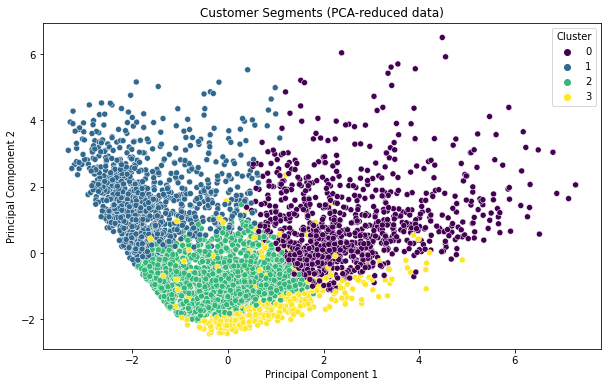

In [11]:
import seaborn as sns

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis')
plt.title('Customer Segments (PCA-reduced data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()
